# **CIS 545 Final Project: Predicting Debt Status using Credit History Datasets**
## Group Members: Amelia Sharpe, Sadek Munawar, Sheon Mwapinza
The goal of this project is to use and compare three Machine Learning (ML) models to predict the debt status of a person based on different factors such as whether or not they own a car, realty, or number of children in their household

# **INTRODUCTION**
Having read multiple articles that highlight the extent of [bias](https://www.brookings.edu/research/algorithmic-bias-detection-and-mitigation-best-practices-and-policies-to-reduce-consumer-harms/) in ML models, we decided to use this project as an opportunity to investigate this issue. According to MIT researcher Joy Buolamwini, facial recognition training datasets are [estimated](https://www.brookings.edu/research/algorithmic-bias-detection-and-mitigation-best-practices-and-policies-to-reduce-consumer-harms/) to be more than 75% male and more than 80% white. Having learnt that the accuracy of a Machine Learning model depends not only on the model but also the training dataset, we were motivated to analyze [two large kaggle datasets](https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction/discussion/119320) on Credit Card applicants to see how accurate Machine Learning models can be and how to improve accuracy of predictions. We employed three of the most common Machine Learning Models to predict the debt status of a credit-card applicant: Linear Regressions, Logistic Regressions, and Random Forests. To analyze the datasets, we used some of Python's most common libraries such as Pandas, Scikit-learn as well as Apache Spark.

# **Step 1: Code Environment Setup**

### **Step 1.1: Import all relevant libraries, java installs and other files**

In [ ]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-8-jdk is already the newest version (8u312-b07-0ubuntu1~18.04).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.
There are 2 choices for the alternative java (providing /usr/bin/java).

  Selection    Path                                            Priority   Status
------------------------------------------------------------
  0            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      manual mode
* 2            /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java   1081      manual mode

Press <enter> to keep the current choice[*], or type selection number: 2


In [ ]:
# Versioning again
!pip install pandas==1.1.5

In [ ]:
# Sklearn and Pandas Setup
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.preprocessing import LabelEncoder

In [ ]:
!apt update
!apt install gcc python-dev libkrb5-dev

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Reading package lists... Done
Building dependency tree       
Reading state infor

### **Step 1.2: Apache Spark Setup for ML**

In [ ]:
!apt install libkrb5-dev
!wget https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
!tar xf spark-3.1.2-bin-hadoop3.2.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
! pip install pyspark --user
! pip install seaborn --user
! pip install plotly --user
! pip install imageio --user
! pip install folium --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libkrb5-dev is already the newest version (1.16-2ubuntu0.2).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 51 not upgraded.
--2022-05-02 15:35:40--  https://downloads.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
Resolving downloads.apache.org (downloads.apache.org)... 135.181.214.104, 88.99.95.219, 2a01:4f9:3a:2c57::2, ...
Connecting to downloads.apache.org (downloads.apache.org)|135.181.214.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228834641 (218M) [application/x-gzip]
Saving to: ‘spark-3.1.2-bin-hadoop3.2.tgz.1’

spark-3.1.2-bin-had 100%[===================>] 218.23M  22.6MB/s    in 11s     

2022-05-02 15:35:51 (20.8 MB/s) - ‘spark-3.1.2-bin-hadoop3.2.tgz.1’ saved [228834641/22

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('proj').getOrCreate()

In [ ]:
%load_ext sparkmagic.magics

In [ ]:
# Graph section
import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter
import pandas as pd
# NoSQL DB
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = '/content/spark-3.1.2-bin-hadoop3.2'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [ ]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)

In [ ]:
!pip install pyspark

In [ ]:
from pyspark.sql import SparkSession

appName = "PySpark"

# Create Spark session
spark = SparkSession.builder.appName(appName).getOrCreate()
spark.conf.set("spark.sql.execution.arrow.enabled", "true")

# **Step 2: Data Wrangling**
Our first dataset, called Application Record, stores the information of a credit card applicant by using a unique identifier. In each row, together with the ID, there are columns including gender, income and income type, highest education level, and housing type.

The second dataset, called Credit Record, stores the ID of the person (which is a foreign key to the ID in the Application Record table, together with their debt status over a varying number of months together with how much they owe (if they owe anything at all)

Since we downloaded the datasets as csv files, we first convert them to Pandas Dataframes to prepare for Data Wrangling and Exploratory Data Analysis (EDA).

## **Step 2.1: Uploading the datasets**

### **Step 2.1.1: Upload the Application Record to Colab and store it as a Pandas Dataframe**

In [ ]:
application_record_df = pd.read_csv('https://raw.githubusercontent.com/sadekmunawar/data_for_ml/main/application_record.csv')

### **Step 2.1.2: Display the first 10 rows in application_record_df**

In [ ]:
application_record_df.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


### **Step 2.1.3: Upload both the Credit Record to Colab and store it as a Pandas Dataframe**

In [ ]:
credit_record_df = pd.read_csv('https://raw.githubusercontent.com/sadekmunawar/data_for_ml/main/credit_record.csv')

### **Step 2.1.4: Display the first 10 rows in credit_record_df**

Status: 0: 1-29 days past due; 1: 30-59 days past due; 2: 60-89 days overdue; 3: 90-119 days overdue; 4: 120-149 days overdue; 5: Overdue or bad debts, write-offs for more than 150 days; C: paid off that month; X: No loan for the month

In [ ]:
credit_record_df.head(10)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


## **Step 2.2: Cleaning the data**

###**Step 2.2.1: Cleaning the Application Record Dataframe** 

### **Step 2.2.1 a): Fill in and drop nulls and remove duplicates** 

In this step, we first fill nulls in the Occupation column with "unknown", drop the nulls and drop columns that will not be useful in the modeling section. 

We also convert some entries into more human-readable values; for example, we calculated the age and number of years employed of a person by dividing the DAYS_BIRTH and DAYS_EMPLOYED columns by 365 respectively.

In [ ]:
application_record_df = application_record_df.drop_duplicates(subset=['ID'], keep='first').reset_index(drop=True)
application_record_df['OCCUPATION_TYPE'] = application_record_df['OCCUPATION_TYPE'].fillna('Unknown')
application_record_df = application_record_df.dropna(axis=0)
application_record_df['AGE'] = application_record_df['DAYS_BIRTH'].apply(lambda x: round(abs(x / 365.0)))
application_record_df['YEARS_EMPLOYED'] = application_record_df['DAYS_EMPLOYED'].apply(lambda x: round(abs(x / 365.0)) if x < 0 else 0)
application_cleaned_df = application_record_df.drop(columns=['DAYS_BIRTH', 'DAYS_EMPLOYED'])

### **Step 2.2.1 b): Further Cleaning** 



In [ ]:
application_cleaned_df['NAME_HOUSING_TYPE'] = application_cleaned_df['NAME_HOUSING_TYPE'].apply(lambda x: 'House' if x.strip() == 'House / apartment' else x)
application_cleaned_df['NAME_FAMILY_STATUS'] = application_cleaned_df['NAME_FAMILY_STATUS'].apply(lambda x: 'Single' if x.strip() == 'Single / not married' else x)
application_cleaned_df.rename(columns={'CODE_GENDER':'GENDER', 'NAME_HOUSING_TYPE' : 'HOUSING_TYPE', 'AMT_INCOME_TOTAL': 'INCOME', 'NAME_INCOME_TYPE': 'INCOME_TYPE', 'NAME_EDUCATION_TYPE': 'EDUCATION'}, inplace=True)

### **Step 2.2.1 c): Display first 5 rows of the cleaned application_record_df** 

In [ ]:
application_cleaned_df.head(5)

,ID,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,INCOME,INCOME_TYPE,EDUCATION,NAME_FAMILY_STATUS,HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,YEARS_EMPLOYED
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Unknown,2.0,33,12
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Unknown,2.0,33,12
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House,1,0,0,0,Security staff,2.0,59,3
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single,House,1,0,1,1,Sales staff,1.0,52,8
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single,House,1,0,1,1,Sales staff,1.0,52,8


### **Step 2.2.2: Cleaning the Credit Record Dataframe** 

### **Step 2.2.1: Convert alphanumeric values to numeric** 
Since the Debt Status column contains alphanumeric values, we create a function, *status_to_int(x)*, to ensure that it is only a numeric column having values from 1 to 9. To strengthen our wrangling, we insert -1 for any value that is a NaN.

In [ ]:
def status_to_int(x):
  if x == '1':
    return 1
  if x == '2':
    return 2
  if x == '3':
    return 3
  if x == '5':
    return 5
  if x == 'C':
    return 6
  if x == 'X':
    return 7
  else:
    return -1

credit_record_df['STATUS'] = credit_record_df.STATUS.apply(lambda x : status_to_int(x))

# **Step 3: Exploratory Data Analysis (EDA)**
After cleaning the two datasets, we needed to explore the data and correlated features. We sought to find answers to some of our questions such as "which age group has the highest income?" or "what is the most common highest education level achieved by the applicants?"

### **Step 3.1: Income Distribution by Age Group and Gender** 

In order to see the most common age group of loan applicants, we first created the function below that places each applicant into an age group. After that we grouped by age group and gender to prepare for a barplot.

In [ ]:
income_distribution_df = application_cleaned_df[['GENDER', 'INCOME', 'AGE', 'YEARS_EMPLOYED']]
def age_group(x):
  if x < 20:
    return '10-19'
  if x < 30:
    return '20-29'
  if x < 40:
    return '30-39'
  if x < 50:
    return '40-49'
  if x < 60:
    return '50-59'
  if x < 70:
    return '60-69'
  else:
    return '70+'
income_distribution_df['AGE_GROUP'] = income_distribution_df['AGE'].apply(lambda x: age_group(x)) 
income_age_gender_df = income_distribution_df[['GENDER', 'INCOME', 'AGE_GROUP']].groupby(['AGE_GROUP', 'GENDER']).mean().reset_index()
income_age_gender_df['INCOME'] = income_age_gender_df['INCOME'].apply(lambda x: int(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


We then plotted a barplot using the grouped dataset, which informed us that the majority of loan applicants are males that are aged 40-49.

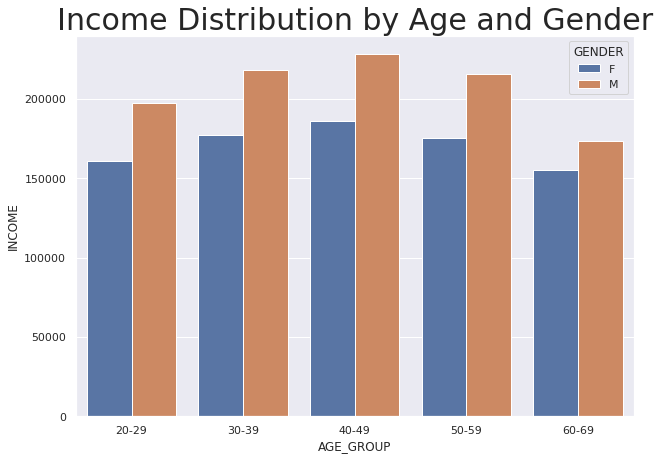

In [ ]:
sns.set(rc = {'figure.figsize':(10,7)})
plt.title("Income Distribution by Age and Gender", fontsize=30)
sns.barplot(x = 'AGE_GROUP',
            y = 'INCOME',
            hue = 'GENDER',
            data = income_age_gender_df)

### **Step 3.2: Income Distribution by Education and Gender** 



Next, we sought to see the education level achieved by the highest-earning applicants and also see how that is related to gender.

From the plot, we learnt that the majority of loan applicants have at least an academic degree


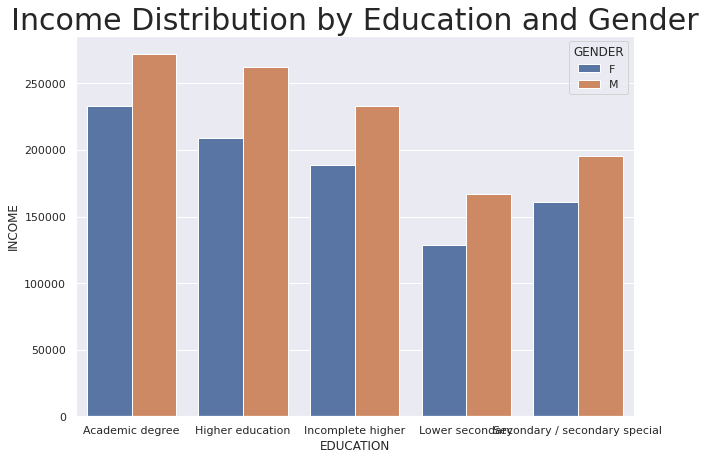

In [ ]:
income_education_df = application_cleaned_df[['GENDER', 'INCOME', 'EDUCATION']]
grouped_income_education_df = income_education_df.groupby(['GENDER', 'EDUCATION']).mean().reset_index()
plt.title("Income Distribution by Education and Gender", fontsize=30)
sns.set(rc = {'figure.figsize':(10,7)})
sns.barplot(x = 'EDUCATION',
            y = 'INCOME',
            hue = 'GENDER',
            data = grouped_income_education_df)

# **Step 4: Modeling**

### **Step 4.1.1: Label Encoding** 

In [ ]:
application_cleaned_df['education_label'] = LabelEncoder().fit_transform(application_cleaned_df['EDUCATION'])
application_cleaned_df['gender_label'] = LabelEncoder().fit_transform(application_cleaned_df['GENDER'])
application_cleaned_df['occupation_label'] = LabelEncoder().fit_transform(application_cleaned_df['OCCUPATION_TYPE'])
application_cleaned_df['housing_label'] = LabelEncoder().fit_transform(application_cleaned_df['HOUSING_TYPE'])
application_cleaned_df['marriage_label'] = LabelEncoder().fit_transform(application_cleaned_df['NAME_FAMILY_STATUS'])
application_cleaned_df['income_label'] = LabelEncoder().fit_transform(application_cleaned_df['INCOME_TYPE'])
application_cleaned_df['own_realty_label'] = LabelEncoder().fit_transform(application_cleaned_df['FLAG_OWN_REALTY'])
application_cleaned_df['own_car_label'] = LabelEncoder().fit_transform(application_cleaned_df['FLAG_OWN_CAR'])


We will now predict a person's debt status. If the loan is paid-off or no loan is taken, then status_label is 0 (no debt).
If there is a overdue balance of age greater than 1 day, then status_label is 1 (there is debt). For each person, there is information on their status for multiple months. Therefore, we will group the credit_record_df dataset by ID and take the most frequent status for each ID as the debt status of that ID.

In [ ]:
def encode_status(x):
  if x >= 6:
    return 0
  else:
    return 1

credit_record_df['status_label'] = credit_record_df['STATUS'].apply(lambda x: encode_status(x))

### find the most common status for each person
credit_most_freq_status = credit_record_df[['ID', 'status_label']].groupby('ID').apply(pd.DataFrame.mode).reset_index(drop=True)


Merge the two encoded datasets.

In [ ]:
merged_credit_info = application_cleaned_df.merge(credit_most_freq_status, how='inner', left_on = 'ID', right_on = 'ID')
merged_credit_ml_df = merged_credit_info[[ 'gender_label','CNT_CHILDREN','INCOME', 'AGE', 'CNT_FAM_MEMBERS', 'YEARS_EMPLOYED', 'education_label', 'occupation_label', 'housing_label', 'marriage_label', 'income_label', 'own_realty_label', 'own_car_label', 'status_label']]


###**Step 4.1.2: Correlation of Feature Variables** 

We will check for correlation between our features since some of the models were are going to use won't work well if we have strong multicollinearity

Text(0.5, 1.0, 'Correlation Heatmap of the features in merged_credit_ml_df')

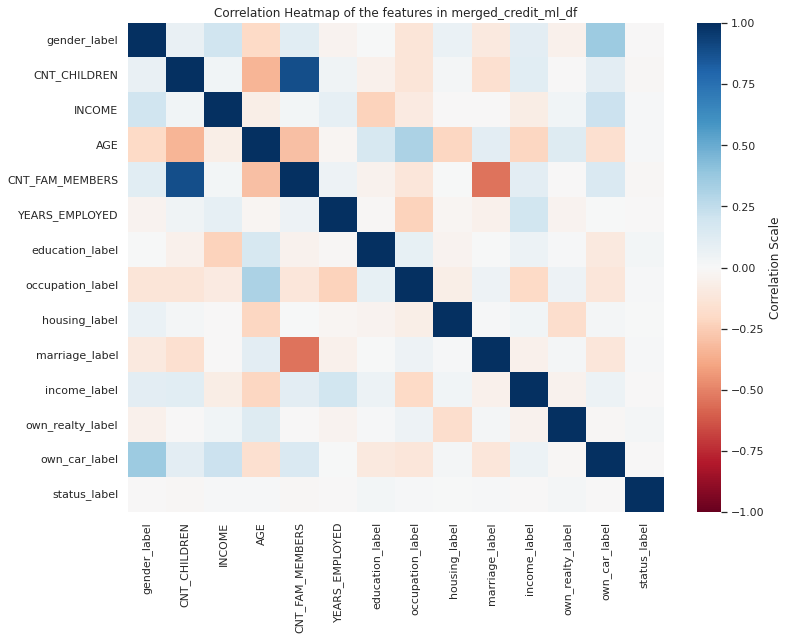

In [ ]:
corr_matrix = merged_credit_ml_df.corr()

sns.set(rc = {'figure.figsize':(12,9)})
heatmp = sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="RdBu", cbar_kws={'label': 'Correlation Scale'})
heatmp.set_title("Correlation Heatmap of the features in merged_credit_ml_df")

In [ ]:
merged_credit_info

,ID,GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,INCOME,INCOME_TYPE,EDUCATION,NAME_FAMILY_STATUS,HOUSING_TYPE,...,YEARS_EMPLOYED,education_label,gender_label,occupation_label,housing_label,marriage_label,income_label,own_realty_label,own_car_label,status_label
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,12,1,1,17,4,0,4,1,1,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,12,1,1,17,4,0,4,1,1,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House,...,3,4,1,16,1,1,4,1,1,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single,House,...,8,4,0,14,1,3,0,1,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single,House,...,8,4,0,14,1,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House,...,7,4,1,10,1,1,4,1,1,0
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House,...,4,1,0,11,1,1,0,1,0,1
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House,...,4,1,0,11,1,1,1,1,0,1
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House,...,2,4,0,14,1,1,4,1,0,1


### **Step 4.2: Classification Models** 

Create spark dataframe from the merged pandas dataframe.

In [ ]:
merged_credit_sdf = spark.createDataFrame(merged_credit_ml_df) 
merged_credit_sdf.printSchema()

root
 |-- gender_label: long (nullable = true)
 |-- CNT_CHILDREN: long (nullable = true)
 |-- INCOME: double (nullable = true)
 |-- AGE: long (nullable = true)
 |-- CNT_FAM_MEMBERS: double (nullable = true)
 |-- YEARS_EMPLOYED: long (nullable = true)
 |-- education_label: long (nullable = true)
 |-- occupation_label: long (nullable = true)
 |-- housing_label: long (nullable = true)
 |-- marriage_label: long (nullable = true)
 |-- income_label: long (nullable = true)
 |-- own_realty_label: long (nullable = true)
 |-- own_car_label: long (nullable = true)
 |-- status_label: long (nullable = true)



In [ ]:
all_columns = merged_credit_sdf.schema.names
drop_columns = ['status_label']
columns_to_use = [col for col in all_columns if col not in drop_columns]

In [ ]:
#create a vector assembler
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols = columns_to_use, outputCol = "features")

**Single stage pipeline**

Create a pipeline and fit the dataset.

In [ ]:
from pyspark.ml import Pipeline

pipe  = Pipeline(stages = [assembler])
modified_data_sdf = pipe.fit(merged_credit_sdf).transform(merged_credit_sdf)

In [ ]:
train_sdf, test_sdf = modified_data_sdf.randomSplit([0.8, 0.2], seed = 24)

## **4.3.1: Unregularized Logistic Regression**

In [ ]:
from pyspark.ml.classification import LogisticRegression

logit = LogisticRegression(featuresCol = "features", labelCol = "status_label", elasticNetParam=1)
logit = logit.fit(train_sdf);

predictions_train = logit.transform(train_sdf)
predictions_test = logit.transform(test_sdf)

Evaluation of the regression model using BinaryClassificationEvaluator

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='status_label')
training_accuracy = evaluator.evaluate(predictions_train) 
test_accuracy = evaluator.evaluate(predictions_test) 
test_area_log = evaluator.evaluate(predictions_test, {evaluator.metricName: "areaUnderROC"})

In [ ]:
training_accuracy

0.5016156073809632

In [ ]:
test_accuracy

0.5006611403809078

## **Step 4.3.2: Random Forest**


In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import StringIndexer

# TO-DO: Instantiate and fit RF Model to training data
rf = RandomForestClassifier(featuresCol = "features", labelCol = "status_label", numTrees = 128, maxDepth = 16)
rf = rf.fit(train_sdf)

Prediction on test and train datasets

In [ ]:
train_pred = rf.transform(train_sdf)
test_pred = rf.transform(test_sdf)

Evaluation using Areas Under the ROC curve

In [ ]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='status_label')
train_area = evaluator.evaluate(train_pred, {evaluator.metricName: "areaUnderROC"})
test_area = evaluator.evaluate(test_pred, {evaluator.metricName: "areaUnderROC"})

In [ ]:
print("train area:", train_area)
print("test area:", test_area)

train area: 0.7586786914233249
test area: 0.6372603984271252


## **Step 4.3.2: OLS (Ordinary Least Squares) Linear Regression**

### **a) Split data into Train and Test**

In [ ]:
train_df = train_sdf.toPandas().copy()
features = train_df.drop(columns = ['status_label', 'features'])
labels = train_df[['status_label']]

/usr/local/lib/python3.7/dist-packages/pyspark/sql/pandas/conversion.py:87: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unsupported type in conversion to Arrow: VectorUDT
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
linregr = LinearRegression()
prem = linregr.fit(x_train, y_train)
y_pred = prem.predict(x_test)
r_squared_score = prem.score(x_test, y_test)


In [ ]:
r_squared_score

0.0012034120043734609

### **b) PCA to Reduce Dimensionality**
We will use Principal Component Analysis to reduce the number of dimensions of our features and make predictions

_**Initial PCA**_

As a first step we instantiate and fit `PCA` from scikit-learn on our training set to determine the number of components to use

Because PCA is **not** scale-invariant we have to scale our features

In [ ]:
# TO-DO: Instantiate and Fit PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

x_train_scalar = StandardScaler().fit_transform(x_train)
y_train_scalar = StandardScaler().fit_transform(y_train)

pca = PCA()
x_train_pca = pca.fit_transform(x_train_scalar)

_**Cumulative Explained Variance Ratios**_

We created an array of explained variance ratios and calculated the _cumulative_ explained variance ratios

In [ ]:
explained_variance_ratios = pca.explained_variance_ratio_
cum_evr = np.cumsum(explained_variance_ratios)

Now we plot the _cumulative_ `explained_variance_ratio` against the number of components to decide the number of components to use.

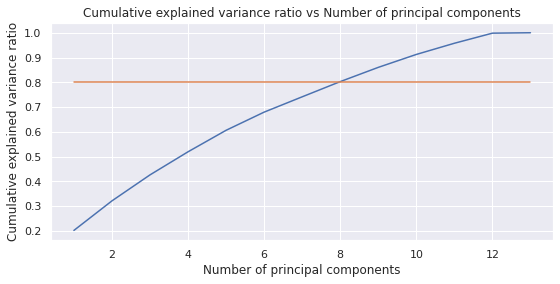

In [ ]:
plt.figure(figsize = (9,4));
sns.lineplot(x = np.arange(1,14), y=cum_evr)
sns.lineplot(x = np.arange(1,14), y=0.8)
plt.title("Cumulative explained variance ratio vs Number of principal components");
plt.xlabel("Number of principal components");
plt.ylabel("Cumulative explained variance ratio");

_**Final PCA**_

Using the results above we will take n=8 components that explains **at least 80% of total variance** in the dataset. 

We will scale our data and fit it into a logistic regression model

In [ ]:
from pyspark.ml.feature import PCA 
from pyspark.ml.feature import StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

scaler = StandardScaler(inputCol='features', outputCol="scaledFeatures", withStd=False, withMean=True)

train_scaledData = scaler.fit(train_sdf).transform(train_sdf)
test_scaledData = scaler.fit(train_sdf).transform(test_sdf)


pca = PCA(k=10, inputCol = scaler.getOutputCol(), outputCol="pcaFeatures")

train_pca = pca.fit(train_scaledData).transform(train_scaledData)
test_pca = pca.fit(test_scaledData).transform(test_scaledData)

lr = LogisticRegression(featuresCol='pcaFeatures', labelCol='status_label', maxIter=10).fit(train_pca)


evaluator = BinaryClassificationEvaluator(labelCol='status_label', rawPredictionCol='rawPrediction')

# TO-DO: Evaluate predictions on train and call this "training_ROC_area_pca"
train_pred = lr.transform(train_pca)
training_ROC_area_pca = evaluator.evaluate(train_pred)

# TO-DO: Evaluate predictions on test and call this "test_ROC_area_pca"
test_pred = lr.transform(test_pca)
test_ROC_area_pca = evaluator.evaluate(test_pred)


In [ ]:
training_ROC_area_pca

0.5225907280721517

In [ ]:
test_ROC_area_pca

0.5195137068936784

# **Discussion/Conclusion**

**JUSTIFICATION OF MODELS**

A lot of the literature on debt predication, credit predication, and loan approvals uses decision trees and random forests for decison making with a few using K Nearest Neighbours and logistic regression ([ResearchGate](searchgate.net)). To make sure our project was comprehensive we compared how one of the populars models for these kind of tasks fairs against the less popular models and we will also compare how some of the less commonly used models for these kind of tasks perfom. 

From the popular models, we chose Random Forests and we used it as our baseline model in comparing how the diffrent models perfom. We chose random forests over decison trees despite both of them being popular because Random forests leverage the power of multiple decision trees hence it does not rely on the feature importance given by a single decision tree, and additionaly Random forests are much more suitable for large datasets. From the less popular models used for these tasks we chose Logistic Regression and lastly we chose liner regression from the models that aren't commonly used for these kind of tasks. 

**Results**

In step 4.2 we fit our data onto an unregularized LASSO logistic regression model which yielded train and test accuracies of around 50%

We also used a fit our data onto a Linear Regression model in Step 4.3 and it yielded score of 0.1%

Because the performance of a logistic regression is heavily impacted by correlations in the dataset, we corrected for this in step 4.3 when we used PCA to pick the important features of the dataset and refit onto the logistic regression and the train and test accuracies increased to 52%

We also fit our data onto a Random Forest model and it yielded a training accuracy of 75.6% and test accuracy of 63.6% 

**Discussion of Results**

Our results are in strong consensus with the literature and the practices in industry. We see that linear regresssion yielded a poor score of 0.1% hence why it isn't used for debt prediction indurstry and why the literatre doesn't recommend it.

Logistic regression performed much better than linear regression with accuracy score of 50% which even improved to 52% after we corrected for the correlation in our dataset using PCA. 

Random Forests yielded the best results with training and test acccuracy scores of 75.6% and 63.6% respectively. This explains why the literature and industry favours it more than the other models because it's much more reliable 

**Next Steps**

As we saw, Random Forests have better performance than the other models we compared it against but the accuracy scores are still relatively low and if the results are going to be used for important decisions such as deciding who gets a loan or mortagage we want to be certain that our decisions are just and fair to the individuals. As next steps we will explore how we can leverage the more powerful deep learning algorithims and models to improve the accuracy of our predictions. We will also explore and source larger datasets from various sources to make sure that our models are properly trained and can yield reliable results for real world applications. As mentioned in the introduction, we also hope to explore ways in which we can reduce biases that might arise within the datasets leading to unfair treatment of individuals while simultaneously maintaining the integrity of the datasets 